<a href="https://colab.research.google.com/github/DajaKrummenacher/Data-Science-FS22-DajaKrummenacher/blob/main/Codingtassk1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
path1 = '/content/drive/MyDrive/Data Science Repo/4ms_10 av_30 s_Absorbance_10-32-04-868 (1).txt'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
with open(path1, 'r') as meta1:
  textlines = meta1.readlines()

content = ''
for i in range(13):
  content += textlines[i]

with open('/content/drive/MyDrive/Data Science Repo/CCD-Data_Header.txt', 'w') as meta2:
  meta2.write(content)

In [3]:
with open(path1, 'r') as meta1:
  textlines = meta1.readlines()

content = ''
for i in range(14, len(textlines)):
  content += textlines[i]

print('CCD-Data has ',len(textlines)-15, 'time stamps.') #can also find out about info on the dataframe there is will show how many row there are, or you could do it with a loop

with open('/content/drive/MyDrive/Data Science Repo/CCD-Data.csv', 'w') as meta3:
  meta3.write(content)

CCD-Data has  355 time stamps.


In [4]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/Data Science Repo/CCD-Data.csv', delimiter='\t', header = 0)
data.head()

,Unnamed: 0,Unnamed: 1,316.6137,316.7492,316.8847,317.0203,317.1558,317.2913,317.4268,317.5623,...,778.9703,779.089,779.2076,779.3263,779.4449,779.5636,779.6822,779.8008,779.9194,780.0381
0,2018-10-25 10:32:04.789000,1540456324789,0.329672,0.329672,0.329672,0.090294,-0.716926,-1.829304,-0.686330,-0.428776,...,-0.038483,-0.039623,-0.036920,-0.037309,-0.037299,-0.037476,-0.036856,-0.036853,-0.039100,-0.035545
1,2018-10-25 10:32:04.878000,1540456324878,-0.044412,-0.044412,-0.044412,0.157632,-0.672423,-2.183981,-0.492421,-0.000000,...,-0.039428,-0.038486,-0.037309,-0.036357,-0.037289,-0.038728,-0.037214,-0.036902,-0.040210,-0.038165
2,2018-10-25 10:32:04.962000,1540456324962,0.338219,0.338219,0.338219,0.330993,-0.879836,-0.000000,-0.559845,-0.000000,...,-0.037725,-0.037534,-0.036560,-0.036152,-0.036554,-0.036875,-0.037351,-0.036746,-0.038686,-0.036903
3,2018-10-25 10:32:05.046000,1540456325046,-0.049682,-0.049682,-0.049682,0.519086,-0.681150,-0.000000,-0.417230,-0.000000,...,-0.037613,-0.037168,-0.036369,-0.034549,-0.036252,-0.037948,-0.036713,-0.035706,-0.038203,-0.036822
4,2018-10-25 10:32:05.129000,1540456325129,0.335086,0.335086,0.335086,-0.041393,-0.000000,-1.802774,-0.510417,-0.000000,...,-0.040919,-0.038288,-0.035840,-0.035638,-0.039504,-0.040093,-0.039953,-0.037656,-0.038082,-0.035900


In [146]:
"""
For Loop - 1 nm steps
"""
%%timeit -n 10000 -r 5 

from math import floor
import pandas as pd

ref = floor(float(data.columns[2]))
res_frame = pd.DataFrame({})

for i in range(len(data.columns[:])):
  sum_same_wl = np.zeros(data.shape[0])
  mean_same_wl = np.zeros(data.shape[0])
  if i == 0 or i == 1:
    res_frame[data.columns[i]] = data.iloc[1:, i].values
    continue
  if floor(float(data.columns[i])) == ref:
    for j in range(len(data.columns[i:])):
      if floor(float(data.columns[i + j])) == ref:
        sum_same_wl += data.iloc[:, i].values.astype(float)
      else:
        mean_same_wl = sum_same_wl[1:] / (j + 1)
        res_frame[str(ref)] = mean_same_wl
        ref = floor(float(data.columns[i + j]))
        break
res_frame.to_csv('drive/MyDrive/Data Science Repo/CCS-Data_average_1nm_loop.csv')
    

SyntaxError: ignored

In [94]:
"""
For Loop - 2 nm steps
"""

from math import floor
import pandas as pd

ref = floor(float(data.columns[2]))
res_frame = pd.DataFrame({})

for i in range(len(data.columns[:])):
  sum_same_wl = np.zeros(data.shape[0])
  mean_same_wl = np.zeros(data.shape[0])
  if i == 0 or i == 1:
    res_frame[data.columns[i]] = data.iloc[1:, i].values
    continue
  if ref <= floor(float(data.columns[i])) <= ref + 1:
    for j in range(len(data.columns[i:])):
      if ref <= floor(float(data.columns[i + j])) <= ref + 1:
        sum_same_wl += data.iloc[:, i].values.astype(float)
      else:
        mean_same_wl = sum_same_wl[1:] / (j + 1)
        res_frame[str(ref) + ' - ' + str(ref + 1)] = mean_same_wl
        ref = floor(float(data.columns[i + j]))
        break
res_frame.to_csv('drive/MyDrive/Data Science Repo/CCS-Data_average_2nm_loop.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


In [95]:
"""
For Loop - 3 nm steps
"""

import pandas as pd

ref = floor(float(data.columns[2]))
res_frame = pd.DataFrame({})

for i in range(len(data.columns[:])):
  sum_same_wl = np.zeros(data.shape[0])
  mean_same_wl = np.zeros(data.shape[0])
  if i == 0 or i == 1:
    res_frame[data.columns[i]] = data.iloc[1:, i].values
    continue
  if ref <= floor(float(data.columns[i])) <= ref + 2:
    for j in range(len(data.columns[i:])):
      if ref <= floor(float(data.columns[i + j])) <= ref + 2:
        sum_same_wl += data.iloc[:, i].values.astype(float)
      else:
        mean_same_wl = sum_same_wl[1:] / (j + 1)
        res_frame[str(ref) + ' - ' + str(ref + 2)] = mean_same_wl
        ref = floor(float(data.columns[i + j]))
        break
res_frame.to_csv('drive/MyDrive/Data Science Repo/CCS-Data_average_3nm_loop.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


In [96]:
"""
For Loop - 4 nm steps
"""

from math import floor
import pandas as pd

ref = floor(float(data.columns[2]))
res_frame = pd.DataFrame({})

for i in range(len(data.columns[:])):
  sum_same_wl = np.zeros(data.shape[0])
  mean_same_wl = np.zeros(data.shape[0])
  if i == 0 or i == 1:
    res_frame[data.columns[i]] = data.iloc[1:, i].values
    continue
  if ref <= floor(float(data.columns[i])) <= ref + 3:
    for j in range(len(data.columns[i:])):
      if ref <= floor(float(data.columns[i + j])) <= ref + 3:
        sum_same_wl += data.iloc[:, i].values.astype(float)
      else:
        mean_same_wl = sum_same_wl[1:] / (j + 1)
        res_frame[str(ref) + ' - ' + str(ref + 3)] = mean_same_wl
        ref = floor(float(data.columns[i + j]))
        break
res_frame.to_csv('drive/MyDrive/Data Science Repo/CCS-Data_average_4nm_loop.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


In [149]:
"""
Pandas - 1 nm steps
"""

import pandas as pd
import numpy as np

res_frame = pd.DataFrame({data.columns[0]: data.iloc[1:, 0].values, data.columns[1]: data.iloc[1:, 1].values})

def handle_range(value):
  mask = data.columns[2:].values.astype(float).astype(int) == value
  mask = np.hstack([False, False, mask])
  res_frame[str(value)] = data.iloc[:, mask].mean(axis=1)

values = np.arange(316, 780)
for i in values:
  handle_range(i)

res_frame.to_csv('drive/MyDrive/Data Science Repo/CCS-Data_average_1nm_pd.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  del sys.path[0]


In [137]:
"""
Pandas - 2 nm steps
"""

import pandas as pd
import numpy as np

res_frame = pd.DataFrame({data.columns[0]: data.iloc[1:, 0].values, data.columns[1]: data.iloc[1:, 1].values})

def handle_range(value):
  mask = data.columns[2:].values.astype(float).astype(int) == value
  mask = np.hstack([False, False, mask])
  res_frame[str(value) + ' - ' + str(value + 1)] = data.iloc[:, mask].mean(axis=1)

values = np.arange(316, 780, step = 2)
for i in values:
  handle_range(i)

res_frame.to_csv('drive/MyDrive/Data Science Repo/CCS-Data_average_2nm_pd.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  del sys.path[0]


In [139]:
"""
Pandas - 3 nm steps
"""

import pandas as pd
import numpy as np

res_frame = pd.DataFrame({data.columns[0]: data.iloc[1:, 0].values, data.columns[1]: data.iloc[1:, 1].values})

def handle_range(value):
  mask = data.columns[2:].values.astype(float).astype(int) == value
  mask = np.hstack([False, False, mask])
  res_frame[str(value) + ' - ' + str(value + 2)] = data.iloc[:, mask].mean(axis=1)

values = np.arange(316, 780, step = 3)
for i in values:
  handle_range(i)

res_frame.to_csv('drive/MyDrive/Data Science Repo/CCS-Data_average_3nm_pd.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  del sys.path[0]


In [140]:
"""
Pandas - 4 nm steps
"""

import pandas as pd
import numpy as np

res_frame = pd.DataFrame({data.columns[0]: data.iloc[1:, 0].values, data.columns[1]: data.iloc[1:, 1].values})

def handle_range(value):
  mask = data.columns[2:].values.astype(float).astype(int) == value
  mask = np.hstack([False, False, mask])
  res_frame[str(value) + ' - ' + str(value + 3)] = data.iloc[:, mask].mean(axis=1)

values = np.arange(316, 780, step = 4)
for i in values:
  handle_range(i)

res_frame.to_csv('drive/MyDrive/Data Science Repo/CCS-Data_average_4nm_pd.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  del sys.path[0]


In [5]:
type(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Columns: 3650 entries, Unnamed: 0 to 780.0381
dtypes: float64(3648), int64(1), object(1)
memory usage: 9.9+ MB


In [9]:
sum = data['317.5623']+ data['318.646']
sum

0     -0.521449
1     -0.000000
2      0.087267
3     -0.000000
4     -0.000000
         ...   
350   -0.000000
351   -0.000000
352    0.570461
353    0.989215
354   -0.241205
Length: 355, dtype: float64

Notes on coding task 1 from lecture. take 2 wavelengths and subtract them.
a column can be accessed via name or via its position. 

In [6]:
#data.to_csv('newCDD.csv') 
# to save the data in the file data to a new document
#

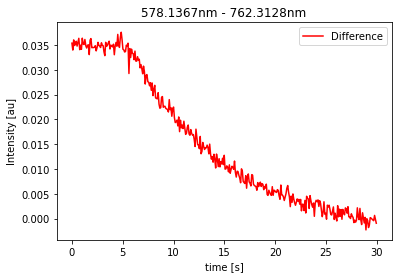

In [187]:
from matplotlib import colors
import matplotlib.pyplot as plt


def compare_wl(x_value, y_value):
  plt.plot(x_value, y_value, color = "red")
  plt.xlabel('time [s]')
  plt.ylabel('Intensity [au]')
  plt.title(str(data.columns[2000]) + 'nm - ' + (data.columns[3500]) + 'nm')
  plt.legend(['Difference'])
  plt.savefig('Difference.png')

x = data.iloc[:,0]
y = data.iloc[:, 2000] - data.iloc[:, 3500]

x = [float(i[-9:]) - float(x[0][-9:]) for i in x]

compare_wl(x, y)

In [172]:
data.columns[2000]

'578.1367'

IndexError: ignored

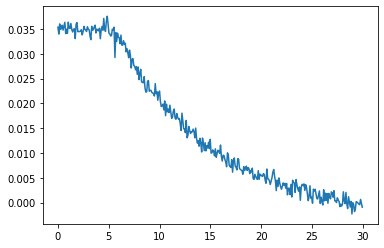

In [221]:
from matplotlib import colors
import matplotlib.pyplot as plt

data_or = pd.read_csv('/content/drive/MyDrive/Data Science Repo/CCD-Data.csv', delimiter='\t', header = 0)
data_1nm = pd.read_csv('/content/drive/MyDrive/Data Science Repo/CCS-Data_average_1nm_pd.csv', delimiter='\t', header = 0)
data_2nm = pd.read_csv('/content/drive/MyDrive/Data Science Repo/CCS-Data_average_2nm_pd.csv', delimiter='\t', header = 0)
data_3nm = pd.read_csv('/content/drive/MyDrive/Data Science Repo/CCS-Data_average_3nm_pd.csv', delimiter='\t', header = 0)
data_4nm = pd.read_csv('/content/drive/MyDrive/Data Science Repo/CCS-Data_average_4nm_pd.csv', delimiter='\t', header = 0)


def compare_wl(x_value, y_value):
  ax.plot(x_value, y_value);
  
  #fig.savefig('Difference.png')


fig, ax = plt.subplots()

a = data_or.iloc[:,0]
b = data_or.iloc[:, 2000] - data_or.iloc[:, 3500]
a = [float(i[-9:]) - float(a[0][-9:]) for i in a]
compare_wl(a, b)

#c = data_1nm.iloc[:,0]
#d = data_1nm.iloc[:, 266] - data_1nm.iloc[:, 450]
#c = [float(i[-9:]) - float(c[0][-9:]) for i in c]
#compare_wl(c, d)

#e = data_2nm.iloc[:,0]
#f = data_2nm.iloc[:, 134] - data_2nm.iloc[:, 226]
#e = [float(i[-9:]) - float(e[0][-9:]) for i in e]
#compare_wl(e, f)


plt.xlabel('time [s]')
plt.ylabel('Intensity [au]')
plt.title(str(data.columns[2000]) + 'nm - ' + (data.columns[3500]) + 'nm')
plt.legend(['original', '1nm'])
plt.show()